# Métodos Numericos 2022

## Parcial 1 - Tema 1 - 26 de Abril de 2022

### Nota sobre la programación en Julia

Recuerde que su notebook tiene que poder ser entendida por otra persona. Para ello:

* Cuando crea conveniente, use texto Markdown para desarrollar o comentar una idea.

* Agregue comentarios a su código de ser necesario.

* Realice gráficos que tengan etiquetas en los ejes y leyendas para cada curva o serie de puntos graficados, como así también un título apropiado.

* Procure respetar reglas de buena programación:

    * Use sangrías adecuadamente.

    * Cuando sea posible, implemente funciones de caracter general, en vez de código específico a cada problema, facilitando así la reutilización de código.

    * Implemente funciones que tengan los argumentos necesarios para su buen funcionamiento.

### Problema 1

Aproxime $\mathrm{sen}(x)$ utlizando la suma truncada 

$$
S_N(x) = \sum_{n=0}^{N} \frac{(-1)^n}{(2n+1)!} x^{2n+1} 
$$

de su serie de Taylor

$$
\mathrm{sen}(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} 
$$

Para ello:

* Implemente una función `suma` que tome como argumentos $x$ y $N$.

* Las función deberá poder aplicarse a valores de $x$ tanto en **precisión simple** (es decir, `Float32`) como en **precisión doble** (es decir, `Float64`), y deberá calcular las suma y retornarla en la misma precisión que $x$.

**Ayuda 1:** Existe una funcion `factorial` en Julia.

**Ayuda 2:** Implemente una función `termino` de $x$ y $n$ que calcule el $n$-ésimo término de la suma en la misma precisión que $x$. Verifique que dicha función opera correctamente. Por ejemplo, `termino(Float32(1.0),1)` tiene que retornar `-0.16666667f0`, i.e. un número en precisión simple (`Float32`). Luego utilice dicha función `termino` en la implementación de `suma`.

Con esta función `suma`, y tanto para **precisión simple** como para **precisión doble**:

1. Calcule un vector de aproximaciones parciales vs $N \in \{0,1,2,...,8\}$ usando $x=0.1$.

2. Correspondientemente, calcule un vector de errores vs $N$, comparando resultados con el valor **"verdadero"** `sin(Float32(x))` o `sin(Float64(x))` según corresponda.

3. Liste en pantalla, usando `DataFrames`, el resultado arrojado y también el valor **"verdadero"** para cada valor de $N$.

4. Utilizando **escala logarítmica** para el eje de las ordenadas (eje $y$), grafique con símbolos ambos vectores de errores en función de $N$. De ser necesario, use en la función `plot` la opción `ylim=(10^(-20),1)` para filtrar posible valores nulos de los errores y evitar problemas con los logaritmos.

Sólo para el caso en precisión doble:

6. Grafique con líneas entrecortadas (usar `linestyle=:dash`) las sumas parciales $S_N(x)$ en función de $x$ para los valores de $N\in \{0,1,2,3,4\}$ en el rango $x\in [0,3]$. Agregue además, una curva de línea sólida negra para `sin(x)` vs `x`. 

No olvide agregar a todos los gráficos un título, etiquetas en los ejes y una leyenda.

**Rta.** Implementamos y testeamos las funciones pertinentes.

In [1]:
using Plots
using LaTeXStrings
using DataFrames

In [104]:
factorial(7)

5040

In [269]:
function termino(x,n)
    if typeof(x) == Float64                           ### presición doble
        Sn = (-1)^n*x^(2*n+1)/factorial(2*n+1)
        return Sn 
    end
    if typeof(x) == Float32                          ### presición simple
        Sn = (-1)^n*x^(2*n+1)/factorial(2*n+1)
        return Sn    ### sentencia return hace que una función finalice de inmediato y que vuelva a la sentencia de llamada a función.
    end
end

termino (generic function with 1 method)

In [110]:
Sn=termino(Float32(1),3)

-0.0001984127f0

In [111]:
typeof(Sn)

Float32

In [117]:
Sn=termino(1.,3)      ### Sn=termino(Float64(1),3)

-0.0001984126984126984

In [118]:
typeof(Sn)

Float64

## 1.

In [268]:
function suma(x,N)
sum=0
#Vsum=zeros(N)
    for i in 0:N                  ### de 1 a N
        sum+=termino(x,i)     ### sum = sum + Float32(1/i)
        i+=1
        #Vsum[i]=sum
        #if i==N
         #  return Vsum[1:N]
        #end
    end
   return sum
end

suma (generic function with 1 method)

In [209]:
sum=suma(0.1,8)

0.09983341664682817

In [210]:
typeof(sum)

Float64

## 2.

In [272]:
function suma(x,N)
sum=0
V_er=Vector{typeof(x)}(undef,N)
senx=sin(x)
    for i in 0:N                  ### de 1 a N
        sum+=termino(x,i)     ### sum = sum + Float32(1/i)
        i+=1
        V_er[i]=abs(sum-senx)
        if i==N
           return sum,V_er[1:N]
        end
    end
   # return sum
end

suma (generic function with 1 method)

### **Precisión doble**

In [226]:
sum2,V_er2=suma(0.1,8)

(0.09983341664682817, [0.0001665833531718508, 8.331349481138783e-8, 1.983851971587569e-11, 2.7478019859472624e-15, 1.3877787807814457e-17, 1.3877787807814457e-17, 1.3877787807814457e-17, 1.3877787807814457e-17])

In [234]:
sum2

0.09983341664682817

In [227]:
typeof(sum2)

Float64

In [228]:
V_er2

8-element Vector{Float64}:
 0.0001665833531718508
 8.331349481138783e-8
 1.983851971587569e-11
 2.7478019859472624e-15
 1.3877787807814457e-17
 1.3877787807814457e-17
 1.3877787807814457e-17
 1.3877787807814457e-17

### **Precisión simple**

In [273]:
sum1,V_er1=suma(Float32(0.1),8)

(0.099833414f0, Float32[0.00016658008, 8.940697f-8, 7.450581f-9, 7.450581f-9, 7.450581f-9, 7.450581f-9, 7.450581f-9, 7.450581f-9])

In [235]:
sum1

0.099833414f0

In [231]:
typeof(sum1)

Float32

In [274]:
V_er1

8-element Vector{Float32}:
 0.00016658008
 8.940697f-8
 7.450581f-9
 7.450581f-9
 7.450581f-9
 7.450581f-9
 7.450581f-9
 7.450581f-9

## 3.

In [275]:
function suma(x,N)
sum=0
Vsum=Vector{typeof(x)}(undef,N)
    if typeof(x) == Float64 
        senx=fill(sin(x),N)
    else
        senx=fill(Float32(sin(x)),N) 
    end
    for i in 0:N                  ### de 1 a N
        sum+=termino(x,i)     ### sum = sum + Float32(1/i)
        i+=1
        Vsum[i]=sum
        if i==N
           return Vsum[1:N],senx
        end
    end
  #return sum
end

suma (generic function with 1 method)

In [256]:
Vsum,senx=suma(0.1,8)

([0.1, 0.09983333333333334, 0.09983341666666667, 0.09983341664682541, 0.09983341664682817, 0.09983341664682817, 0.09983341664682817, 0.09983341664682817], [0.09983341664682815, 0.09983341664682815, 0.09983341664682815, 0.09983341664682815, 0.09983341664682815, 0.09983341664682815, 0.09983341664682815, 0.09983341664682815])

In [257]:
tabla = DataFrame(SN=Vsum,aproxJulia=senx)

,SN,aproxJulia
,Float64,Float64
1,0.1,0.0998334
2,0.0998333,0.0998334
3,0.0998334,0.0998334
4,0.0998334,0.0998334
5,0.0998334,0.0998334
6,0.0998334,0.0998334
7,0.0998334,0.0998334
8,0.0998334,0.0998334


### **Precisión simple**

In [276]:
Vsum,senx=suma(Float32(0.1),8)

(Float32[0.1, 0.09983333, 0.099833414, 0.099833414, 0.099833414, 0.099833414, 0.099833414, 0.099833414], Float32[0.09983342, 0.09983342, 0.09983342, 0.09983342, 0.09983342, 0.09983342, 0.09983342, 0.09983342])

In [277]:
tabla = DataFrame(SN=Vsum,aproxJulia=senx)

,SN,aproxJulia
,Float32,Float32
1,0.1,0.0998334
2,0.0998333,0.0998334
3,0.0998334,0.0998334
4,0.0998334,0.0998334
5,0.0998334,0.0998334
6,0.0998334,0.0998334
7,0.0998334,0.0998334
8,0.0998334,0.0998334


## 4.

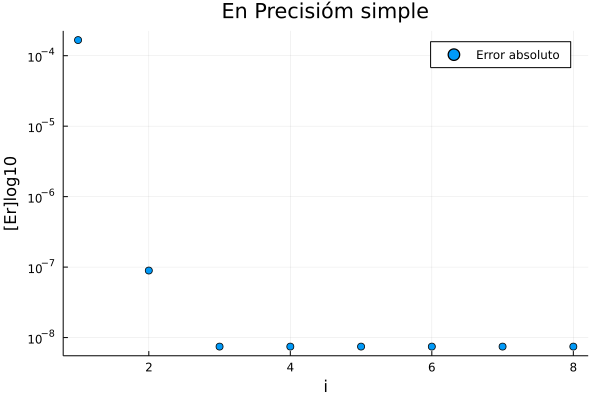

In [287]:
scatter(V_er1,yscale=:log10,title="En Precisióm simple",xlabel="i",ylabel="[Er]log10",label="Error absoluto")

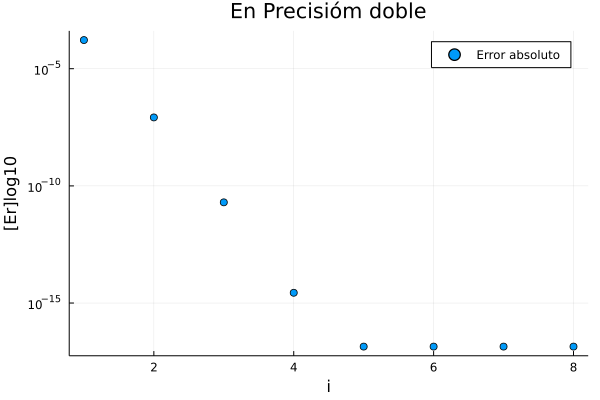

In [285]:
scatter(V_er2,yscale=:log10,title="En Precisióm doble",xlabel="i",ylabel="[Er]log10",label="Error absoluto")

## 6.

In [302]:
function suma_parcial(x,N;a=0,b=3,n=500)
    x=(b-a)/n
    sump=zeros(n,N)
        for i in 1:n
        sump[i,N]=suma(x,N)
        if i==N
            return sump[1:N]
        end
    end
end

suma_parcial (generic function with 1 method)

In [303]:
sumo=suma_parcial(0.1,1)

LoadError: MethodError: [0mCannot `convert` an object of type [92mTuple{Vector{Float64}, Vector{Float64}}[39m[0m to an object of type [91mFloat64[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::Gray24[39m) where T<:Real at ~/.julia/packages/ColorTypes/6m8P7/src/conversions.jl:114
[0m  convert(::Type{T}, [91m::Gray[39m) where T<:Real at ~/.julia/packages/ColorTypes/6m8P7/src/conversions.jl:113
[0m  convert(::Type{T}, [91m::Base.TwicePrecision[39m) where T<:Number at /opt/julias/julia-1.7/share/julia/base/twiceprecision.jl:262
[0m  ...

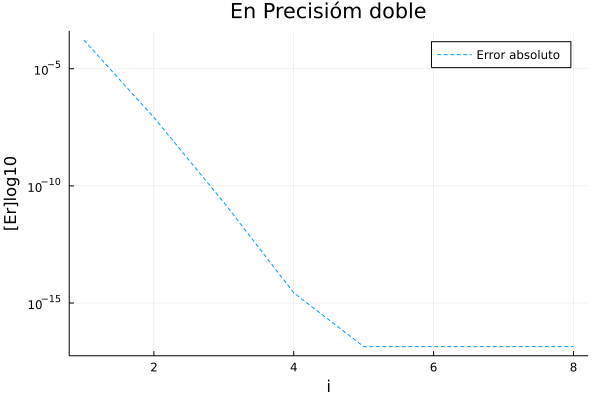

In [289]:
plot(V_er2,yscale=:log10,title="En Precisióm doble",xlabel="i",ylabel="[Er]log10",label="Error absoluto",linestyle=:dash)

### Problema 2

#### Parte A.

Una variación muy utilizada de método de Newton-Raphson para encontrar raíces múltiples viene dada por la siguiente iteración:
$$
p_{n+1} = p_{n} - \, m \, \frac{f(p_n)}{f^{\prime}(p_n)},
$$
donde, $p_n$ es la $n$-ésima aproximación a la raíz $x$ y $m$ es el orden de la raíz. Note que para el caso de raíces simples ($m=1$) se recupera la fórmula usual del método.

Escriba una función que permita utilizar este método en el caso donde conocemos el órden de la raíz.

Los argumentos de dicha función deberán ser:

* la función a la que queremos encontrar su raíz,

* su derivada, 

* la aproximación inicial $p_1$ a la raíz buscada,

* el orden presupuesto de la raíz buscada,

* la tolerancia en $x$, `tol_x`, con un valor por defecto de `1e-4`,

* la tolerancia en $f$, `tol_f`, con un valor por defecto de `1e-5`,

* el número máximo de iteraciones $n_{\max}$, con un valor por defecto de `10`.

El algoritmo debe detenerse cuando el error relativo en $x$ sea menor que `tol_x` **y** el error absoluto en $f(x)$ sea menor a `tol_f`, o cuando el número de iteraciones alcance el valor $n_{\max}$. 

El programa retornar los siguiente valores:

* un booleano indicando si convergió (`true`) o no (`false`).

* un vector con las aproximaciones $p_n$,

* un vector con los valores $f(p_n)$ de $f$ en las aproximaciones, 

* un vector de estimaciones $|p_n - p_{n+1}|/|p_{n+1}|$ de errores relativos $\varepsilon_x^n = |p_n - p_{n+1}|/|p_{n+1}|$ de $x$, 

* y un vector de errores absolutos $\varepsilon_f^n = |f(p_n)|$ de $f(x)$.

#### Parte B

Con la función así definida encuentre una raíz de la siguiente función:

$$
f(x)= 2 e^{x-2} - 2x + 2 
$$

1. Grafique dicha función en el intervalo $[0,3]$. 

2. Grafique también la primera derivada $f^{\prime}$ y la segunda derivada $f^{\prime\prime}$ todas en un mismo gráfico. 

3. Observando el gráfico, deduzca el orden de la raíz. Explique.

4. Encuentre una estimación a  la raíz de la función usando $m=1$, $p_1=1$, `tol_x`$=10^{-6}$, `tol_f`$=10^{-7}$ y $n_{\max}=100$.
 
5. Encuentre una estimación a  la raíz de la función usando $m=2$, $p_1=1$, `tol_x`$=10^{-6}$, `tol_x`$=10^{-7}$ y $n_{\max}=100$.

6. Grafique el error relativo en $x$, $\varepsilon_x$ en función del número de iteración $n$, para ambos valores de $m$, con escala lineal en $x$ y logarítmica en $y$. 

7. Comente los resultados obtenidos. Explique en particular en detalle porqué se observan diferentes comportamientos para $m=1$ y $m=2$.

In [27]:
function Newton_Raphson_Raices_Multiples(f,df,p,m;tol_x=1e-4,tol_f=1e-5,n_max=10)
    Vp=zeros(n_max)
    Vf=zeros(n_max)
    Vc=zeros(n_max)
    Vr=zeros(n_max)
    for i in 1:n_max
        p1=p
        p+=-m*f(p)/df(p)         ###  p=p-f(p)/df(p)
        Vp[i]=p
        Vf[i]=f(p)
        Vc[i]=abs(p-p1)
        Vr[i]=Vc[i]/abs(p)
        if Vr[i]<tol_x && Vf[i]<tol_f
            return (true,Vp[1:i],Vf[1:i],Vc[1:i],Vr[1:i])  ### retorna los vectores de dim=i
        end
    end
    return false,Vp,Vf,Vc,Vr ### retorna los valores de la última itaracion
end

Newton_Raphson_Raices_Multiples (generic function with 1 method)

In [19]:
f(x)=2*exp(x-2)-2*x+2
df(x)=2*exp(x-2)-2
d2f(x)=2*exp(x-2)

d2f (generic function with 1 method)

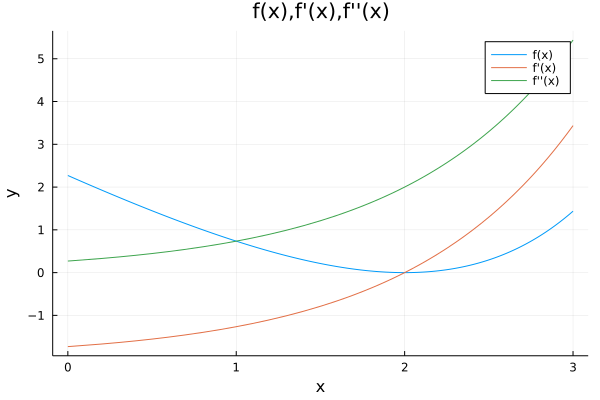

In [25]:
plot(0:0.001:3,f,title="f(x),f'(x),f''(x)",xlabel="x",ylabel="y",label="f(x)")
plot!(df,label="f'(x)")
plot!(d2f,label="f''(x)")

*El orden de la raíz $x1$ es $2$ ya que $f(x1)=0$, $f'(x1)=0$ y $f''(x1)≠0$*

In [43]:
p=2.5
m=1
comv1,Vp1,Vf1,Vc1,Vr1 = Newton_Raphson_Raices_Multiples(f,df,p,m;tol_x=1e-6,tol_f=1e-7,n_max=100)

(true, [2.270747041268399, 2.1414747338454063, 2.072404735819328, 2.0366392002240197, 2.018431466858568, 2.0092440431832075, 2.0046291426093337, 2.002316357050799, 2.001158625651214, 2.0005794246932975, 2.00028974032434, 2.0001448771579087, 2.000072440328148, 2.000036220600182, 2.0000181104071224, 2.000009055233071, 2.0000045276219103, 2.0000022637893715, 2.00000113188555], [0.08039274517416084, 0.020993328320545235, 0.005371295575529622, 0.0013589774763436147, 0.0003418157965175972, 8.57162523644206e-5, 2.146206550568408e-5, 5.369655199150003e-6, 1.3429320016022928e-6, 3.357978286544494e-7, 8.395756401213816e-8, 2.099040452563372e-8, 5.247728029900145e-9, 1.3119478836642884e-9, 3.279887472729115e-10, 8.199751988513526e-11, 2.049960201588874e-11, 5.1247894816697226e-12, 1.2811973704174306e-12], [0.229252958731601, 0.12927230742299267, 0.0690699980260785, 0.03576553559530815, 0.018207733365451784, 0.009187423675360407, 0.004614900573873815, 0.002312785558534536, 0.0011577313995849714, 0

In [44]:
n=length(Vp1)

19

In [71]:
p=2.5
m=2
comv2,Vp2,Vf2,Vc2,Vr2 = Newton_Raphson_Raices_Multiples(f,df,p,m;tol_x=1e-6,tol_f=1e-7,n_max=100)

(true, [2.041494082536798, 2.000286951580009, 2.0000000137236813, 2.0000000137236813], [0.0017458222561947956, 8.234908577264832e-8, 0.0, 0.0], [0.458505917463202, 0.04120713095678896, 0.00028693785632771807, 0.0], [0.22459331201854582, 0.02060060978963034, 0.00014346892717939812, 0.0])

In [72]:
n=length(Vp2)

4

In [66]:
scatter(0:18,Vr1,yscale=:log10,xlabel="i",ylabel="[Er]log10",label="m=1",title="Error Relatiivo",ylim=(-0.01,0.25))
scatter!(Vr2,label="m=2")

┌ Warning: No strict ticks found
└ @ PlotUtils /home/rdpaula/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /home/rdpaula/.julia/packages/PlotUtils/jNTYY/src/ticks.jl:191


*En el caso donde m=1 el algoritmo opera con valores de $f(p)/f'(p)$ muy chicos y necesita mas iteraciones para 
para converger, o puede que no converga al sumar valores iguales o menores a la del punto flotante mas cercano 
a $0$.
En el caso $m=2$, $m*f(p)/f'(p)$ contribuye para que el programa converga más rapido ($m$ depende del odern de la raiz).*